<a href="https://colab.research.google.com/github/bmurmann/Ngspice-on-Colab/blob/main/notebooks/GF180MCU_VGS_sweep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GF180MCU V<sub>GS</sub> sweep

Tool setup adopted from @proppy (see this [Colab notebook](https://colab.research.google.com/gist/proppy/a0c5ed3e28e942f1621200dcf67bad5a/sky130-pyspice-playground.ipynb#scrollTo=q0XHBAt1jGmQ))

# Tool setup

In [1]:
#@title Bootstrap conda environment {display-mode: "form"}
#@markdown - Click the ▷ button to initialize the conda-eda environment.
#@markdown - Wait for the installation to complete
#@markdown - Click the `Restart Kernel` button.
%pip install -q https://github.com/conda-incubator/condacolab/archive/28521d7c5c494dd6377bb072d97592e30c44609c.tar.gz
import condacolab

condacolab.install(restart_kernel=False)

     - 35.3 kB 1.9 MB/s 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:22
🔁 Please restart kernel...


Button(description='Restart kernel now...', style=ButtonStyle())

Output(layout=Layout(border='1px solid black'))

### Install dependencies

- Wait for the kernel restart to complete.
- Click the ▷ button below to run the hidden cells to complete the setup.

In [2]:
%%writefile environment.yml
channels:
  - conda-forge
dependencies:
  - ngspice

Writing environment.yml


In [3]:
!mamba env update -n base -f environment.yml

[+] 0.0s
[+] 0.1s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 0.2s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 0.3s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 0.4s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 0.5s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 0.6s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 0.7s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 0.8s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 0.9s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 1.0s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 1.1s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 1.2s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 1.3s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 1.4s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 1.5s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 1.6s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 1.7s
conda-forge/linux-64  

In [4]:
!git clone https://github.com/google/globalfoundries-pdk-libs-gf180mcu_fd_pr.git

Cloning into 'globalfoundries-pdk-libs-gf180mcu_fd_pr'...
remote: Enumerating objects: 1402, done.
remote: Counting objects: 100% (267/267), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 1402 (delta 205), reused 200 (delta 194), pack-reused 1135
Receiving objects: 100% (1402/1402), 227.45 MiB | 17.91 MiB/s, done.
Resolving deltas: 100% (701/701), done.
Updating files: 100% (1218/1218), done.


# Simulation

In [5]:
%%writefile .spiceinit
set ngbehavior=hs

Writing .spiceinit


In [12]:
%%writefile netlist.spice
* PMOS VGS sweep

.include "globalfoundries-pdk-libs-gf180mcu_fd_pr/models/ngspice/design.ngspice"
.lib "globalfoundries-pdk-libs-gf180mcu_fd_pr/models/ngspice/sm141064.ngspice" typical

.param width=10u
X1 vdp vgp 0 vbp pmos_3p3 w=width l=0.28u AD={width*0.24u} AS={width*0.24u} PD={2*(width + 0.24u)} PS={2*(width + 0.24u)}
vsdp     0  vdp        dc 0.9  
vsgp     0  vgp        dc 0.9    
vsbp     0  vbp        dc 0
.op
.option post nomod
.end

.control
save all @m.x1.m0[gm] @m.x1.m0[id]  @m.x1.m0[cgg] 
dc vsgp 0 1.8 0.01
display
wrdata output.txt @m.x1.m0[gm] @m.x1.m0[id]  @m.x1.m0[cgg]
.endc

Overwriting netlist.spice


In [13]:
!ngspice -b netlist.spice


Note: Compatibility modes selected: hs



Circuit: * pmos vgs sweep

Doing analysis at TEMP = 27.000000 and TNOM = 27.000000


No. of Data Rows : 181
Here are the vectors currently active:

Title: * pmos vgs sweep
Name: dc1 (DC transfer characteristic)
Date: Fri Feb 24 19:02:44  2023

    @m.x1.m0[cgg]       : capacitance, real, 181 long
    @m.x1.m0[gm]        : admittance, real, 181 long
    @m.x1.m0[id]        : current, real, 181 long
    v-sweep             : voltage, real, 181 long [default scale]
    vbp                 : voltage, real, 181 long
    vdp                 : voltage, real, 181 long
    vgp                 : voltage, real, 181 long
    vsbp#branch         : current, real, 181 long
    vsdp#branch         : current, real, 181 long
    vsgp#branch         : current, real, 181 long
Doing analysis at TEMP = 27.000000 and TNOM = 27.000000


No. of Data Rows : 1
	Node                                  Voltage
	----                                  -------
	----	-------
	vb

In [14]:
import math
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("output.txt", delim_whitespace=True, header=None)
df.columns = ["vsg", "gm", "vsg1", "id", "vsg2", "cgg"]
df['gm_id'] = df['gm']/df['id']
df['f_T'] = df['gm']/df['cgg']/2/math.pi
df

,vsg,gm,vsg1,id,vsg2,cgg,gm_id,f_T
0,0.00,6.153022e-13,0.00,2.285804e-14,0.00,5.091556e-15,26.918410,1.923349e+01
1,0.01,8.053590e-13,0.01,2.991877e-14,0.01,5.068577e-15,26.918182,2.528853e+01
2,0.02,1.054117e-12,0.02,3.916042e-14,0.02,5.046018e-15,26.917922,3.324759e+01
3,0.03,1.379706e-12,0.03,5.125660e-14,0.03,5.023882e-15,26.917623,4.370864e+01
4,0.04,1.805851e-12,0.04,6.708892e-14,0.04,5.002171e-15,26.917280,5.745709e+01
...,...,...,...,...,...,...,...,...
176,1.76,8.075524e-04,1.76,5.639172e-04,1.76,9.709513e-15,1.432041,1.323712e+10
177,1.77,8.079143e-04,1.77,5.719947e-04,1.77,9.714539e-15,1.412451,1.323620e+10
178,1.78,8.080993e-04,1.78,5.800749e-04,1.78,9.719732e-15,1.393095,1.323215e+10
179,1.79,8.081069e-04,1.79,5.881561e-04,1.79,9.725102e-15,1.373967,1.322497e+10


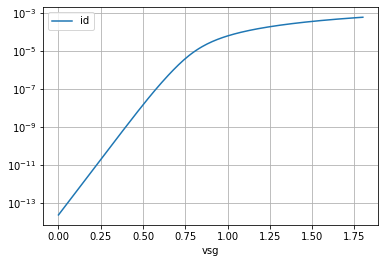

In [15]:
df.plot(x="vsg", y="id", logy=True, grid=True)
plt.show()

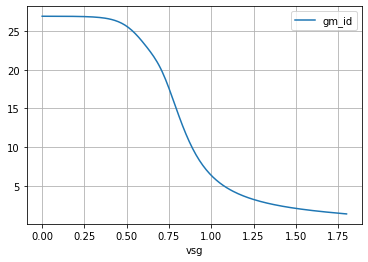

In [16]:
df.plot(x="vsg", y="gm_id", grid=True)
plt.show()

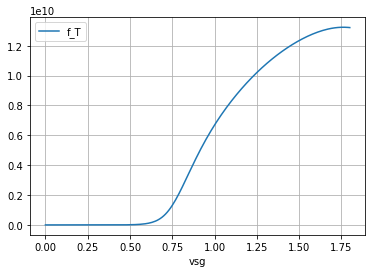

In [17]:
df.plot(x="vsg", y="f_T", grid=True)
plt.show()